# HW8

## 1. Principal Component Analysis

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

```1).```

In [2]:
'''function sets'''
def txt2image(pathname):
    ### Read this text file as a string ###
    filetest = open(pathname,"r");
    text = filetest.read();
    filetest.close(); 
    
    def line2num_list(line):
        ### line is a string without '\n'
        ### but only has ' ' and  str(int)
        
        num_list = []; ## the returned item
        
        start = 0;
        while start < len(line):
            if line[start] != ' ':
                end = start;
                while line[end] != ' ':
                    if end >= len(line):
                        break;
                    end += 1;
                num_list.append(float(line[start:end]));
                
                start = end;
            start += 1;
        return num_list;
            
    
    nums = [];
    
    start = 0;
    end = 0;    
    while end <= len(text):
        if text[end] == '\n':
            line = (text[start:end]);
            nums.append(line2num_list(line));
            start = end + 1;
            if start >= len(text):
                break;
        end += 1;
        
    
    return np.array(nums);
    

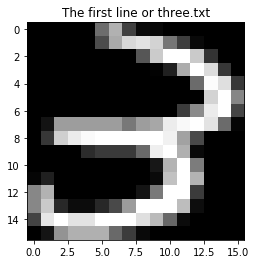

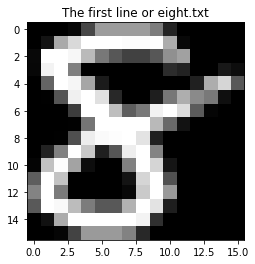

In [3]:
'''Visualization'''
three = txt2image('three.txt');
eight = txt2image('eight.txt');

## transposed : 
## in image reshape by column (in python reshape by row)
## so revert and transpose
img_three_col0 = three[0:1,:].reshape(16,16).T;
img_eight_col0 = eight[0:1,:].reshape(16,16).T;
plt.figure();
plt.imshow(img_three_col0, cmap = 'gray');
plt.title('The first line or three.txt');
plt.show();

plt.figure();
plt.imshow(img_eight_col0, cmap = 'gray');
plt.title('The first line or eight.txt');
plt.show();

```2).```

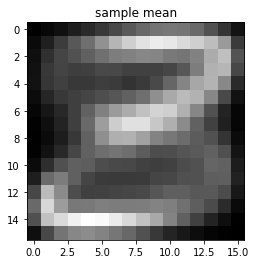

In [4]:
X = np.vstack((three, eight));
y = X.mean(axis = 0);
plt.figure();
plt.imshow(np.reshape(y,(16,16)).T, cmap = 'gray');
plt.title("sample mean");
plt.show();

```3).```

In [5]:
X_centered = X - np.reshape(y, (1,-1));
S = X_centered.T.dot(X_centered) / (len(X_centered)-1);
print(S[0:5, 0:5]); ## showing the submatrix

[[  59.16729323  142.14943609   28.68201754   -7.17857143  -14.3358396 ]
 [ 142.14943609  878.93879073  374.13731203   24.12778195  -87.12781955]
 [  28.68201754  374.13731203 1082.9058584   555.2268797    33.72431078]
 [  -7.17857143   24.12778195  555.2268797  1181.24408521  777.77192982]
 [ -14.3358396   -87.12781955   33.72431078  777.77192982 1429.95989975]]


```4).```

In [26]:
eigen_val, eigen_vec = np.linalg.eig(S);
eigen_val1 = eigen_val[0];
eigen_val2 = eigen_val[1];
#eigen_vec1 = eigen_vec[0,:];
#eigen_vec2 = eigen_vec[1,:];
eigen_vec1 = eigen_vec[:,0];
eigen_vec2 = eigen_vec[:,1];
print("The greatest two eigen values are:\n %.4e, %.4e" %(eigen_val1, eigen_val2));
#print(np.max(eigen_val))

The greatest two eigen values are:
 2.3716e+05, 1.4519e+05


In [39]:
def vector2image(vec, r,c , title):
    vec2 = vec - np.min(vec);
    vec2 /= np.max(vec2);
    vec2 = np.round(vec2 * 255);
    
    color_map = np.reshape(vec2, (r,c)).T;
    plt.figure();
    plt.imshow(color_map, cmap = 'gray');
    plt.colorbar();
    plt.title(title);
    plt.show();

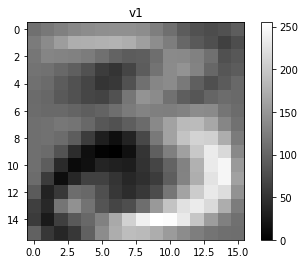

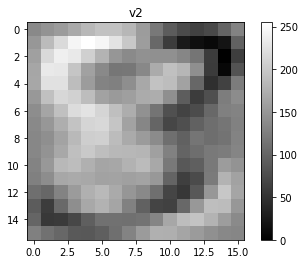

In [40]:
vector2image(eigen_vec1, 16,16, 'v1');
vector2image(eigen_vec2, 16,16, 'v2');

```5).```

In [33]:
V = eigen_vec[:,:2];
projection = X_centered.dot(V);

In [34]:
def array2str(array, digit=4):
    string = '';
    for i in range(len(array)):
        title = '%.' + str(digit) +'e';
        string += title%array[i];
        if i < (len(array) -1):
            string += ',';
    return string;
print("the resulting coordinates for the first line of three.txt is \n" + array2str(projection[0,:]))
print("the resulting coordinates for the first line of eight.txt is \n" + array2str(projection[200,:]))

the resulting coordinates for the first line of three.txt is 
1.3621e+02,-2.4263e+02
the resulting coordinates for the first line of eight.txt is 
-3.1269e+02,6.4957e+02


In [35]:
# test if the eigen decomposition is correct
np.sum(S - eigen_vec.dot(np.diag(eigen_val).dot(np.linalg.pinv(eigen_vec))))

5.604755251922833e-09

```6).```

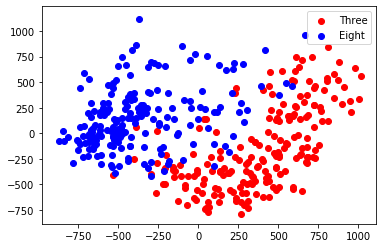

In [36]:
plt.figure();
plt.scatter(projection[:200,0], projection[:200,1], c = "r", label = "Three");
plt.scatter(projection[200:,0], projection[200:,1], c = "b", label = "Eight");
plt.legend();
plt.show();

## 2. Q-Learning 

### 1).

In [60]:
def Action(mu = 0.5):
    a = np.sign(np.random.rand(1).item()-mu);
    return int(a);

epochs = 200;

In [61]:
gamma = 0.9;
alpha = 0.5;

# A is 1 B is -1 stay is 1 move is -1
r = {1:1, -1:0};

Q = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};
#MaxQ = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};

step = 0;
s = 1;
while step < epochs:
    step += 1;
    a = Action();
    s1 = s*a;
    Q[(s,a)] = (1-alpha) * Q[(s,a)] + alpha* (r[a] + gamma * max(Q[(s1,1)], Q[(s1,-1)]));
    s = s1;
    #print(Q)
print(Q);    

{(1, 1): 9.465197882608184, (1, -1): 8.199260059970214, (-1, 1): 9.11069184663349, (-1, -1): 8.42990006842889}


### 2).

In [62]:
gamma = 0.9;
alpha = 0.5;

# A is 1 B is -1 stay is 1 move is -1
r = {1:1, -1:0};

Q = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};
#MaxQ = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};
step = 0;
s = 1;
while step < epochs:
    step += 1;
    eps = Action(0.5);
    if eps == -1:
        a = Action();
    else:
        if Q[(s,1)] >  Q[(s,-1)]:
            a = 1;
        elif Q[(s,1)] <  Q[(s,-1)]:
            a = -1;
        else:
            a = Action();
    
    s1 = s*a;
    Q[(s,a)] = (1-alpha) * Q[(s,a)] + alpha* (r[a] + gamma * max(Q[(s1,1)], Q[(s1,-1)]));
    s = s1;
    #print(Q)
print(Q);    


{(1, 1): 9.989104692211523, (1, -1): 8.079634222655283, (-1, 1): 8.541560010643789, (-1, -1): 8.987023114710901}


### 3).

In [63]:
gamma = 0.9;
alpha = 0.5;

# A is 1 B is -1 stay is 1 move is -1
r = {1:1, -1:0};

Q = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};
#MaxQ = {(1,1):0, (1,-1):0, (-1,1):0, (-1,-1): 0};
step = 0;
s = 1;
while step < epochs:
    step += 1;
    Q_stay = (1-alpha) * Q[(s,1)] + alpha* (r[1] + gamma * max(Q[(s1,1)], Q[(s1,-1)]));
    Q_move = (1-alpha) * Q[(s,-1)] + alpha* (r[-1] + gamma * max(Q[(s1,1)], Q[(s1,-1)]));
    if Q_stay > Q_move:
        a = 1;
        Q[(s,a)] = Q_stay;
    elif Q_stay <= Q_move:
        a = -1;
        Q[(s,a)] = Q_move;
    s1 = s*a;
    #Q[(s,a)] = (1-alpha) * Q[(s,a)] + alpha* (r[a] + gamma * max(Q[(s1,1)], Q[(s1,-1)]));
    s = s1;
    #print(Q)
print(Q); 

{(1, 1): 9.999649473337515, (1, -1): 0, (-1, 1): 0, (-1, -1): 0}


### 4).